## MNIST digit classifier using CNN in torch

In [1]:
#importing the required libraries

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets , transforms
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils


import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.ion()

In [2]:
#loading the MNIST dataset from torch.MNIST class

train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=False)
test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

In [3]:
#finding the size of the loaded data 
# 60000 -> number of images 
# 28*28 -> size of the images

print(train_dataset.train_data.size())
print(train_dataset.train_labels.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


In [4]:
#test_data has 10000 images
print(test_dataset.test_data.size())
print(test_dataset.test_labels.size())

torch.Size([10000, 28, 28])
torch.Size([10000])


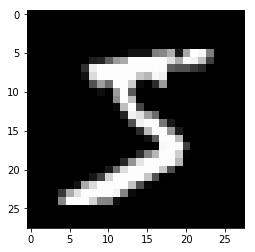

In [5]:
# plotting random images from the dataset to get know about the type of images

plt.imshow(train_dataset.train_data[0].numpy(),cmap='gray')
plt.show()

In [6]:
#loading the data into torch dataloader for training and testing
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

In [7]:
#defining the structure of our model, used 3 convolutional layers , with 3 ReLU and two max pools 

class Arch(nn.Module):
    
    def __init__(self):
        super(Arch,self).__init__()
        self.seq_1 =  nn.Sequential(nn.Conv2d(1,8,kernel_size=3,padding=1),nn.ReLU())
        self.seq_2 = nn.Sequential(nn.Conv2d(8,12,kernel_size=3,padding=1),nn.ReLU(),nn.MaxPool2d(2, stride=2))
        self.seq_3 = nn.Sequential(nn.Conv2d(12,16,kernel_size=3,padding=1),nn.ReLU(),nn.MaxPool2d(2, stride=2))
        self.fc = nn.Linear(16*7*7,10)
    
    def forward(self,x):
        x = self.seq_1(x)
        x = self.seq_2(x)
        x = self.seq_3(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return nn.functional.log_softmax(x)        

In [8]:
#initializing our model
cnn = Arch()
print(cnn)
#to see how our strategy of decreasing the learning rate with training works..  
loss_list = []
lr_list = []

Arch(
  (seq_1): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (seq_2): Sequential(
    (0): Conv2d(8, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (seq_3): Sequential(
    (0): Conv2d(12, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=784, out_features=10, bias=True)
)


In [9]:
#defing our training function
def train(epoch,lr,arch):
    #optimizer used is SGD with momentum 
    optimizer = optim.SGD(cnn.parameters(),lr=lr,momentum=0.5,dampening=0.75)
    arch.train()
    
    for i in range(epoch):
        for batch_idx,(data,label) in enumerate(train_loader):
            data,label = Variable(data),Variable(label)
            optimizer.zero_grad()             #after one step reinitializing the gradients to zero
            output = arch.forward(data)       #forward pass 
            loss = nn.functional.nll_loss(output,label)  #calculating the loss
            loss.backward()                   
            optimizer.step()                  #updating the parameters
            if(batch_idx%30 == 0):
               print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(i, batch_idx * len(data), len(train_loader.dataset),100. * batch_idx / len(train_loader), loss.data[0]))          

In [10]:
#training our model
train(4,0.5,cnn)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.291120
Train Epoch: 0 [960/60000 (2%)]	Loss: 1.558821
Train Epoch: 0 [1920/60000 (3%)]	Loss: 0.559015
Train Epoch: 0 [2880/60000 (5%)]	Loss: 0.512242
Train Epoch: 0 [3840/60000 (6%)]	Loss: 0.369250
Train Epoch: 0 [4800/60000 (8%)]	Loss: 0.180393
Train Epoch: 0 [5760/60000 (10%)]	Loss: 0.202994
Train Epoch: 0 [6720/60000 (11%)]	Loss: 0.221051
Train Epoch: 0 [7680/60000 (13%)]	Loss: 0.015287
Train Epoch: 0 [8640/60000 (14%)]	Loss: 0.027045
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.174384
Train Epoch: 0 [10560/60000 (18%)]	Loss: 0.400482
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.046980
Train Epoch: 0 [12480/60000 (21%)]	Loss: 0.085015
Train Epoch: 0 [13440/60000 (22%)]	Loss: 0.175087
Train Epoch: 0 [14400/60000 (24%)]	Loss: 0.093272
Train Epoch: 0 [15360/60000 (26%)]	Loss: 0.050775
Train Epoch: 0 [16320/60000 (27%)]	Loss: 0.157661
Train Epoch: 0 [17280/60000 (29%)]	Loss: 0.037356
Train Epoch: 0 [18240/60000 (30%)]	Loss: 0.062617
Train Epoch: 0 [19200

Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.162310
Train Epoch: 2 [39360/60000 (66%)]	Loss: 0.015730
Train Epoch: 2 [40320/60000 (67%)]	Loss: 0.005924
Train Epoch: 2 [41280/60000 (69%)]	Loss: 0.031267
Train Epoch: 2 [42240/60000 (70%)]	Loss: 0.032028
Train Epoch: 2 [43200/60000 (72%)]	Loss: 0.010420
Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.016495
Train Epoch: 2 [45120/60000 (75%)]	Loss: 0.055319
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.095686
Train Epoch: 2 [47040/60000 (78%)]	Loss: 0.013784
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.111004
Train Epoch: 2 [48960/60000 (82%)]	Loss: 0.132793
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.007125
Train Epoch: 2 [50880/60000 (85%)]	Loss: 0.093045
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.086077
Train Epoch: 2 [52800/60000 (88%)]	Loss: 0.013547
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.312774
Train Epoch: 2 [54720/60000 (91%)]	Loss: 0.063939
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.003406
Train Epoch: 2 [56640/60000 (94%)]	Loss: 0.002149


In [11]:
#defining the test function of our model
def test(arch):
    arch.eval()
    test_loss = 0
    accurate_pred = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = arch.forward(data)  #forward pass for test set
        # sum up batch loss
        test_loss += nn.functional.nll_loss(output, target, size_average=False).data[0]
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        accurate_pred += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, accurate_pred, len(test_loader.dataset),
        100. * accurate_pred / len(test_loader.dataset)))


In [12]:
#printing the accuracy and loss of test set and also the number of classes classified correctly by the model
test(cnn)


Test set: Average loss: 0.0441, Accuracy: 9847/10000 (98%)

